In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Salary_Data_Cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,monthly,hourly,Salary,company_txt,Age,Python,Deep Learning,Spark
0,Data Scientist,"₹9,96,452 /yr (est.)","Data Science Analyst\nQualification : BE, MBA\...",-1.0,Six Sails Group,Farīdābād,NaN,-1.0,NaN,NaN,NaN,NaN,0,0,996452.0,Six Sails Group,-1.0,1,0,0
1,Data Scientist,"₹5,66,099 /yr (est.)",Responsibilities\n• Anchor ML development trac...,3.9,Infosys Limited\n3.9,Bangalore,10000+ Employees,1981.0,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),0,0,566099.0,Infosys Limited\n,41.0,1,0,1
2,Sr. Data Scientist,"₹9,60,000 /mo (est.)",Be part of team using advanced real-time scale...,3.9,Lotus Interworks Inc\n3.9,Cochin,1 to 50 Employees,1997.0,Company - Private,Computer Hardware Development,Information Technology,$1 to $5 million (USD),1,0,960000.0,Lotus Interworks Inc\n,25.0,1,0,0
3,"Faculty Member in Data science , FSWD , Cloud ...","₹3,30,000 /mo (est.)","Faculty in Data science, FSWD, Cloud and DevOp...",-1.0,Subbarao Vamanan and co,Hyderābād,NaN,-1.0,NaN,NaN,NaN,NaN,1,0,330000.0,Subbarao Vamanan and co,-1.0,0,0,0
4,DNA_Analytics,"₹8,12,637 /yr (est.)",Responsibilities\nApplies business processes p...,3.9,Infosys Limited\n3.9,Bangalore,10000+ Employees,1981.0,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),0,0,812637.0,Infosys Limited\n,41.0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'monthly', 'hourly', 'Salary',
       'company_txt', 'Age', 'Python', 'Deep Learning', 'Spark'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    55
na                24
analyst           11
mle               10
manager            9
data engineer      1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        101
senior      9
Name: seniority, dtype: int64

In [9]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      1618
1      1718
2      3100
3       188
4      1572
       ... 
105    2572
106    2583
107    4696
108    1959
109    2124
Name: desc_len, Length: 110, dtype: int64

In [10]:
# Hourly and montly wage into annual wage
df['Salary'] = df.apply(lambda x: x.Salary*2000 if x.hourly ==1 else x.Salary, axis =1)
df['Salary'] = df.apply(lambda x: x.Salary*12 if x.monthly ==1 else x.Salary, axis =1)

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,hourly,Salary,company_txt,Age,Python,Deep Learning,Spark,job_simp,seniority,desc_len
0,Data Scientist,"₹9,96,452 /yr (est.)","Data Science Analyst\nQualification : BE, MBA\...",-1.0,Six Sails Group,Farīdābād,NaN,-1.0,NaN,NaN,...,0,996452.0,Six Sails Group,-1.0,1,0,0,data scientist,na,1618
1,Data Scientist,"₹5,66,099 /yr (est.)",Responsibilities\n• Anchor ML development trac...,3.9,Infosys Limited\n3.9,Bangalore,10000+ Employees,1981.0,Company - Public,Information Technology Support Services,...,0,566099.0,Infosys Limited\n,41.0,1,0,1,data scientist,na,1718
2,Sr. Data Scientist,"₹9,60,000 /mo (est.)",Be part of team using advanced real-time scale...,3.9,Lotus Interworks Inc\n3.9,Cochin,1 to 50 Employees,1997.0,Company - Private,Computer Hardware Development,...,0,11520000.0,Lotus Interworks Inc\n,25.0,1,0,0,data scientist,senior,3100
3,"Faculty Member in Data science , FSWD , Cloud ...","₹3,30,000 /mo (est.)","Faculty in Data science, FSWD, Cloud and DevOp...",-1.0,Subbarao Vamanan and co,Hyderābād,NaN,-1.0,NaN,NaN,...,0,3960000.0,Subbarao Vamanan and co,-1.0,0,0,0,na,na,188
4,DNA_Analytics,"₹8,12,637 /yr (est.)",Responsibilities\nApplies business processes p...,3.9,Infosys Limited\n3.9,Bangalore,10000+ Employees,1981.0,Company - Public,Information Technology Support Services,...,0,812637.0,Infosys Limited\n,41.0,0,0,0,na,na,1572


In [12]:
df.company_txt

0                    Six Sails Group
1                  Infosys Limited\n
2             Lotus Interworks Inc\n
3            Subbarao Vamanan and co
4                  Infosys Limited\n
                   ...              
105                       Sun Life\n
106                       Sun Life\n
107        Boston Consulting Group\n
108    Boston Institute of Analytics
109                 ADCI - Haryana\n
Name: company_txt, Length: 110, dtype: object

In [13]:
# To remove the newline char
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                    Six Sails Group
1                    Infosys Limited
2               Lotus Interworks Inc
3            Subbarao Vamanan and co
4                    Infosys Limited
                   ...              
105                         Sun Life
106                         Sun Life
107          Boston Consulting Group
108    Boston Institute of Analytics
109                   ADCI - Haryana
Name: company_txt, Length: 110, dtype: object

In [14]:
df.describe()

,Rating,Founded,monthly,hourly,Salary,Age,Python,Deep Learning,Spark,desc_len
count,110.000000,110.00000,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.155455,1492.10000,0.063636,0.009091,1.149762e+06,69.900000,0.727273,0.181818,0.236364,3423.736364
std,1.892166,815.83272,0.245221,0.095346,2.078516e+06,73.274018,0.447400,0.387460,0.426792,2303.491330
min,-1.000000,-1.00000,0.000000,0.000000,5.770000e+04,-1.000000,0.000000,0.000000,0.000000,72.000000
25%,3.700000,1799.00000,0.000000,0.000000,5.251912e+05,10.000000,0.000000,0.000000,0.000000,1684.500000
50%,4.000000,1907.00000,0.000000,0.000000,6.050050e+05,41.000000,1.000000,0.000000,0.000000,2759.500000
75%,4.100000,1981.00000,0.000000,0.000000,8.472488e+05,115.000000,1.000000,0.000000,0.000000,5088.250000
max,4.800000,2017.00000,1.000000,1.000000,1.152000e+07,295.000000,1.000000,1.000000,1.000000,10401.000000


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'monthly', 'hourly', 'Salary',
       'company_txt', 'Age', 'Python', 'Deep Learning', 'Spark', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

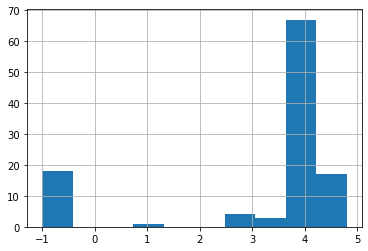

In [16]:
df.Rating.hist()

<AxesSubplot:>

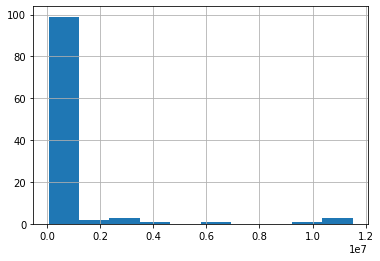

In [17]:
df.Salary.hist()

<AxesSubplot:>

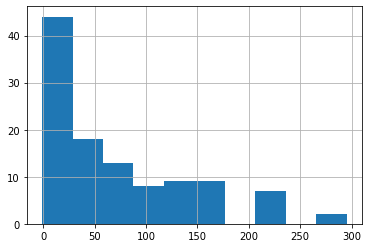

In [18]:
df.Age.hist()

<AxesSubplot:>

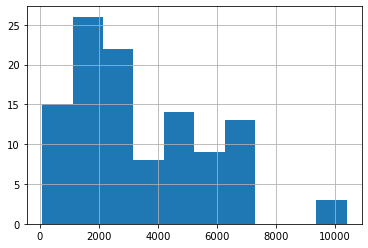

In [19]:
df.desc_len.hist()

<AxesSubplot:>

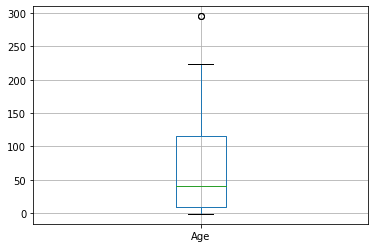

In [20]:
df.boxplot(column = ['Age'])

<AxesSubplot:>

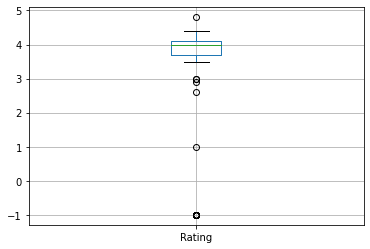

In [21]:
df.boxplot(column = ['Rating'])

<AxesSubplot:>

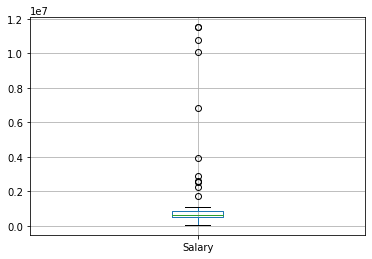

In [22]:
df.boxplot(column = ['Salary'])

In [23]:
df[['Age','Salary','Rating','desc_len']].corr()

,Age,Salary,Rating,desc_len
Age,1.000000,-0.278091,0.429778,0.390582
Salary,-0.278091,1.000000,-0.417075,-0.224633
Rating,0.429778,-0.417075,1.000000,0.368779
desc_len,0.390582,-0.224633,0.368779,1.000000


<AxesSubplot:>

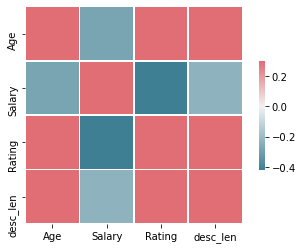

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age','Salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'monthly', 'hourly', 'Salary',
       'company_txt', 'Age', 'Python', 'Deep Learning', 'Spark', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'company_txt', 'Python', 'Deep Learning', 'Spark', 'job_simp',
       'seniority', 'desc_len']]

graph for Location: total = 12


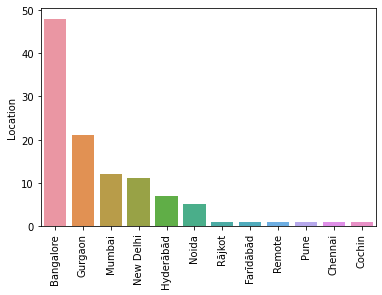

graph for Size: total = 6


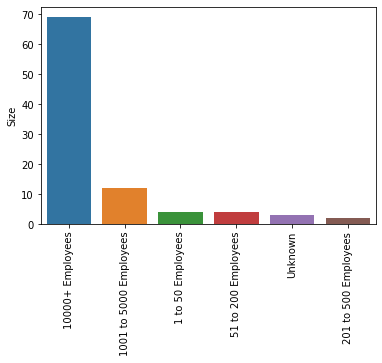

graph for Type of ownership: total = 5


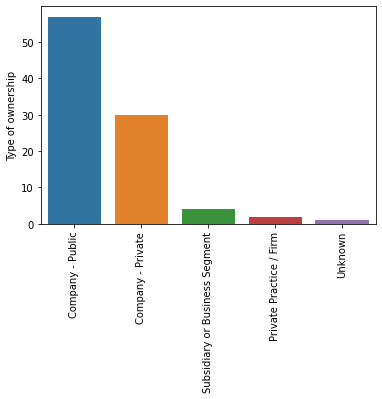

graph for Industry: total = 20


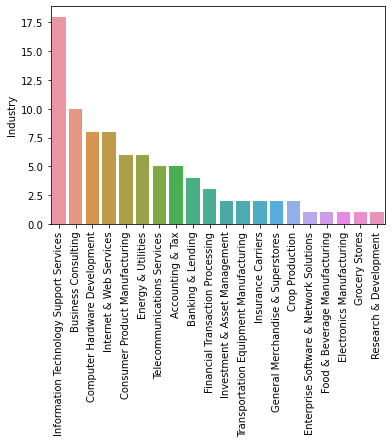

graph for Sector: total = 9


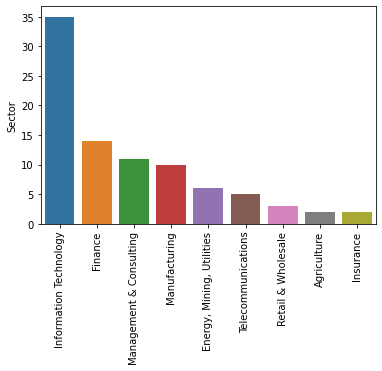

graph for company_txt: total = 63


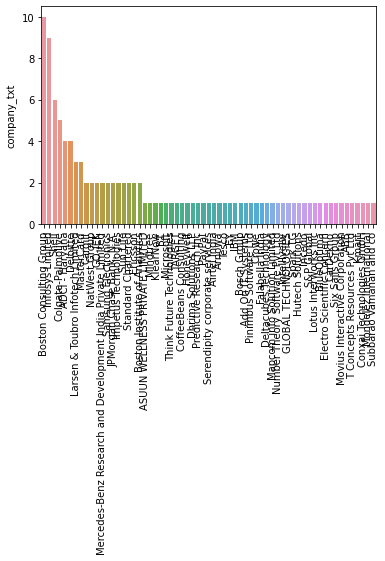

graph for Python: total = 2


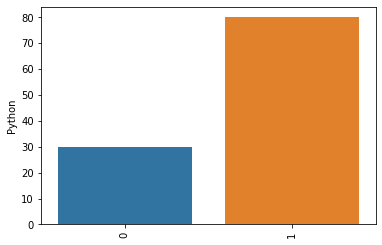

graph for Deep Learning: total = 2


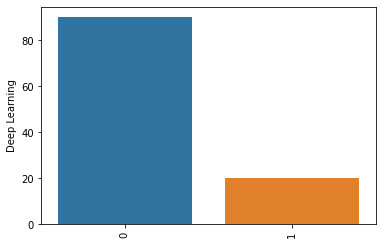

graph for Spark: total = 2


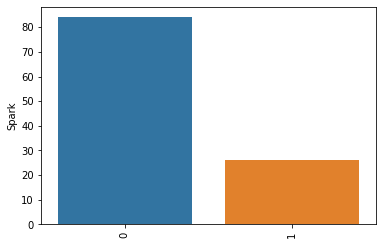

graph for job_simp: total = 6


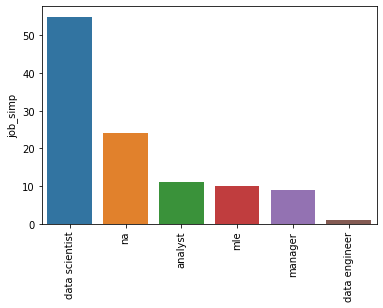

graph for seniority: total = 2


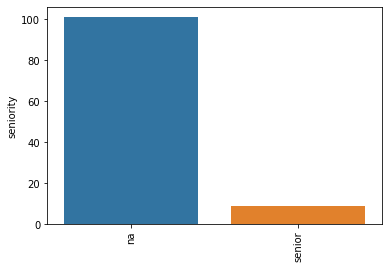

graph for desc_len: total = 100


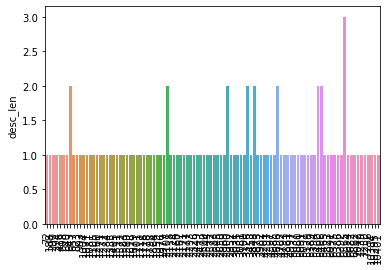

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 12


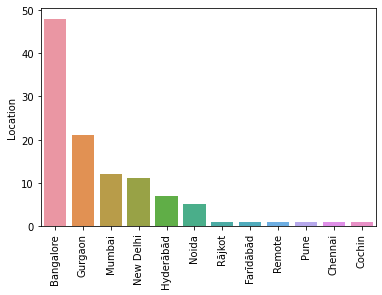

graph for company_txt: total = 20


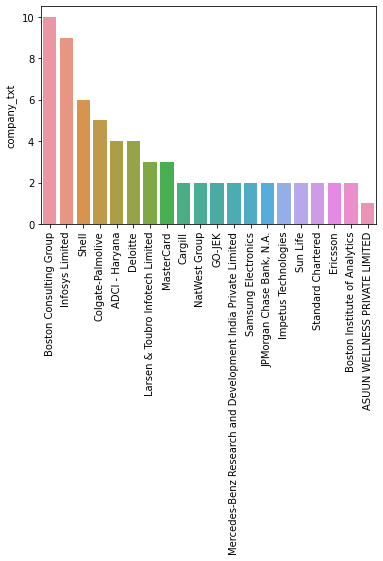

In [28]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'monthly', 'hourly', 'Salary',
       'company_txt', 'Age', 'Python', 'Deep Learning', 'Spark', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'Salary')

,Salary
job_simp,
analyst,4.707937e+05
data engineer,6.996070e+05
data scientist,1.369645e+06
manager,7.950563e+05
mle,1.482366e+06
na,9.702436e+05


In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'Salary')

Salary
job_simp       seniority              
analyst        na         4.707937e+05
data engineer  na         6.996070e+05
data scientist na         1.021989e+06
               senior     5.802261e+06
manager        na         7.950563e+05
mle            na         2.391654e+06
               senior     5.730786e+05
na             na         9.702436e+05

In [32]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Salary').sort_values('Location', ascending = False)

Salary
Location  job_simp                    
Rājkot    data scientist  2.500000e+05
Remote    data scientist  2.880000e+06
Pune      data scientist  2.250000e+06
Noida     na              6.840000e+06
          mle             1.008000e+07
          data scientist  5.531403e+05
New Delhi manager         8.900820e+05
          analyst         5.598396e+05
Mumbai    na              4.152349e+05
          mle             5.270310e+05
          data scientist  9.216500e+05
Hyderābād na              3.960000e+06
          manager         6.050050e+05
          data scientist  4.650078e+06
Gurgaon   na              6.309470e+05
          mle             5.344227e+05
          data scientist  5.578636e+05
          analyst         4.178980e+05
Farīdābād data scientist  9.964520e+05
Cochin    data scientist  1.152000e+07
Chennai   data scientist  8.282250e+05
Bangalore data engineer   6.996070e+05
          na              6.992498e+05
          mle             5.215828e+05
          data scientist  1.047400e+06
          analyst         2.900430e+05

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'Salary', aggfunc = 'count').sort_values('Location', ascending = False)

Salary
Location  job_simp              
Rājkot    data scientist       1
Remote    data scientist       1
Pune      data scientist       1
Noida     na                   1
          mle                  1
          data scientist       3
New Delhi manager              6
          analyst              5
Mumbai    na                   9
          mle                  2
          data scientist       1
Hyderābād na                   1
          manager              3
          data scientist       3
Gurgaon   na                   5
          mle                  3
          data scientist       8
          analyst              5
Farīdābād data scientist       1
Cochin    data scientist       1
Chennai   data scientist       1
Bangalore data engineer        1
          na                   8
          mle                  4
          data scientist      34
          analyst              1

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'Salary').sort_values('Salary', ascending = False)

,Salary
Location,
Cochin,1.152000e+07
Hyderābād,4.650078e+06
Remote,2.880000e+06
Pune,2.250000e+06
Bangalore,1.047400e+06
Farīdābād,9.964520e+05
Mumbai,9.216500e+05
Chennai,8.282250e+05
Gurgaon,5.578636e+05


In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'Python', 'Deep Learning', 'Spark', 'Type of ownership','Salary']]

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'Salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $5 million (USD),NaN,3.0
$10+ billion (USD),17.0,27.0
$100 to $500 million (USD),NaN,2.0
$25 to $50 million (USD),NaN,1.0
$5 to $10 billion (USD),NaN,15.0
$5 to $25 million (USD),3.0,2.0
$500 million to $1 billion (USD),NaN,1.0
Less than $1 million (USD),NaN,2.0
Unknown / Non-Applicable,6.0,15.0


In [38]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

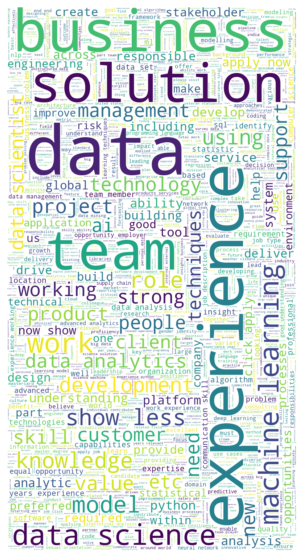

In [39]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('eda_data.csv')